In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit import RDPaths

from map4 import MAP4Calculator
import tmap as tm


RDKit WARNING: [17:43:28] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
dim = 2048
sdf = Chem.SDMolSupplier(os.path.join(RDPaths.RDDocsDir,'Book/data/cdk2.sdf'))
enc = tm.Minhash(dim)

In [3]:
mols = [m for m in sdf]
fps  = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=dim) for m in mols]

In [4]:
MAP4_unf = MAP4Calculator(dimensions=dim, is_folded=False) #default
#map4_unf_fps = [MAP4_unf.calculate(m) for m in mols]
map4_unf_fps = MAP4_unf.calculate_many(mols)

MAP4_f = MAP4Calculator(dimensions=dim, is_folded=True) #folded
#map4_f_fps = [MAP4_f.calculate(m) for m in mols]
map4_f_fps = MAP4_f.calculate_many(mols)


In [5]:
morgan_dist = []
for i in range(len(fps)):
    for j in range(i):
        tc = DataStructs.TanimotoSimilarity(fps[i], fps[j], returnDistance=1)
        morgan_dist.append(tc)

In [6]:
map4_unf_dist = []
for i in range(len(map4_unf_fps)):
    for j in range(i):
        map4_dist = enc.get_distance(map4_unf_fps[i], map4_unf_fps[j])
        map4_unf_dist.append(map4_dist)

In [7]:
def tanimoto_d(u, v):
    return 1 - np.count_nonzero(u & v) / np.count_nonzero(u | v)

In [8]:
map4_f_dist = []
for i in range(len(map4_f_fps)):
    for j in range(i):
        map4_dist = tanimoto_d(map4_f_fps[i], map4_f_fps[j])
        map4_f_dist.append(map4_dist)

Text(0, 0.5, 'unfolded MAP4FP')

<Figure size 432x288 with 0 Axes>

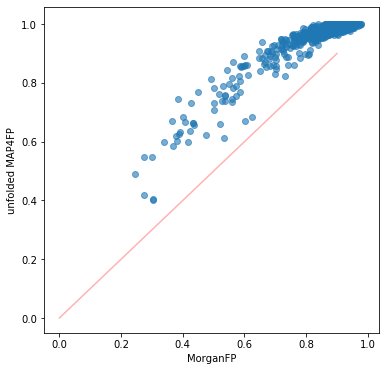

In [9]:
plt.clf()
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 1., 0.1),np.arange(0, 1., 0.1), c='red', alpha=0.3)
plt.scatter(morgan_dist, map4_unf_dist, alpha=0.6)
plt.xlabel('MorganFP')
plt.ylabel('unfolded MAP4FP')

Text(0, 0.5, 'folded MAP4FP')

<Figure size 432x288 with 0 Axes>

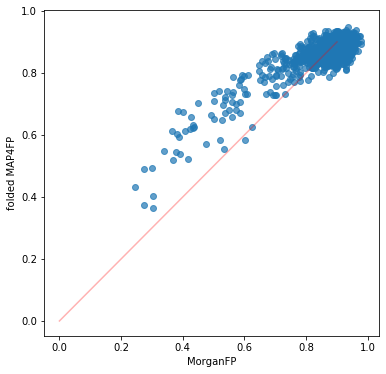

In [10]:
plt.clf()
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 1., 0.1),np.arange(0, 1., 0.1), c='red', alpha=0.3)
plt.scatter(morgan_dist, map4_f_dist, alpha=0.7)
plt.xlabel('MorganFP')
plt.ylabel('folded MAP4FP')

Text(0, 0.5, 'folded MAP4FP')

<Figure size 432x288 with 0 Axes>

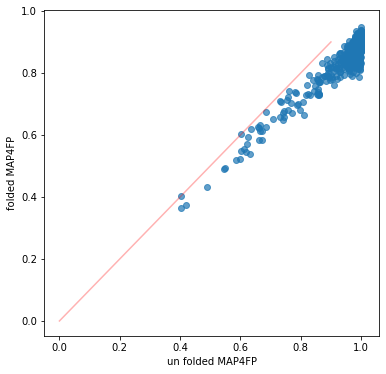

In [11]:
plt.clf()
plt.figure(figsize=(6,6))
plt.plot(np.arange(0, 1., 0.1),np.arange(0, 1., 0.1), c='red', alpha=0.3)
plt.scatter(map4_unf_dist, map4_f_dist, alpha=0.7)
plt.xlabel('un folded MAP4FP')
plt.ylabel('folded MAP4FP')
